<a href="https://colab.research.google.com/github/Tatutina/HeartDisease_Project/blob/preproocessing/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключить Google Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

# 2. Создайте структуру папок проекта
!mkdir -p /content/HeartDisease_Project/{preprocessing,statistical_analysis,machine_learning,data,reports}
!mkdir -p /content/drive/MyDrive/HeartDisease_Project/{preprocessing,statistical_analysis,machine_learning,data,reports}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
%%writefile /content/HeartDisease_Project/preprocessing/data_cleaning.py
import pandas as pd
print("Предобработка данных загружена")

Overwriting /content/HeartDisease_Project/preprocessing/data_cleaning.py


# ПРЕДОБРАБОТКА ДАННЫХ

## ИМПОРТ ДАННЫХ

In [40]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных

In [41]:
heart = pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_ssz - heart_ssz.tsv', sep='\t')
heart.head().T # выведем первые 5 строк таблицы

,0,1,2,3,4
ID,0,1,2,3,4
Бронхиальная астма,0,0,0,0,0
ЛПНП,2.79,6.62,3.17,2.74,6.62
Возраст алког,18.0,NaN,17.0,13.0,16.0
Работа,1,0,0,1,0
ВИЧ/СПИД,0,0,0,0,0
Статус Курения,Курит,Никогда не курил(а),Никогда не курил(а),Бросил(а),Никогда не курил(а)
Пассивное курение,0,0,1,1,1
Переломы,0,1,0,0,1
Время пробуждения,6:00:00,4:00:00,7:00:00,7:00:00,6:00:00


In [42]:
display(heart.tail())

,ID,Бронхиальная астма,ЛПНП,Возраст алког,Работа,ВИЧ/СПИД,Статус Курения,Пассивное курение,Переломы,Время пробуждения,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ
951,951,0,2.80,26.0,1,0,Курит,0,0,7:15:00,...,0,21:30:00,0,10.0,3 - средняя школа / закон.среднее / выше среднего,26.0,0,Христианство,низкоквалифицированные работники,0
952,952,0,3.28,20.0,0,0,Бросил(а),0,0,8:00:00,...,1,22:30:00,0,10.0,3 - средняя школа / закон.среднее / выше среднего,27.8,0,Христианство,служащие,1
953,953,0,2.57,21.0,1,0,Никогда не курил(а),0,0,8:30:00,...,0,23:00:00,0,NaN,5 - ВУЗ,23.1,0,Атеист / агностик,"представители законодат. органов власти,...",0
954,954,0,3.53,17.0,1,0,Курит,0,1,5:00:00,...,1,22:00:00,0,30.0,4 - профессиональное училище,27.6,0,Христианство,операторы и монтажники установок и машинного о...,1
955,956,0,3.81,NaN,0,0,Никогда не курил(а),1,1,5:00:00,...,0,23:00:00,0,NaN,3 - средняя школа / закон.среднее / выше среднего,34.0,0,Ислам,ведение домашнего хозяйства,1


## ПРОВЕРКА ДАННЫХ

* Количество строк и столбцов в датафрейме

In [43]:
heart.shape  #строки, столбцы

(956, 42)

* Информацию о признаках

In [44]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      956 non-null    int64  
 1   Бронхиальная астма                      956 non-null    int64  
 2   ЛПНП                                    956 non-null    float64
 3   Возраст алког                           788 non-null    float64
 4   Работа                                  956 non-null    int64  
 5   ВИЧ/СПИД                                956 non-null    int64  
 6   Статус Курения                          956 non-null    object 
 7   Пассивное курение                       956 non-null    int64  
 8   Переломы                                956 non-null    int64  
 9   Время пробуждения                       956 non-null    object 
 10  ЛПВП                                    956 non-null    float6

## Пропущенные значения

In [45]:
print(heart.isnull().sum())

ID                                          0
Бронхиальная астма                          0
ЛПНП                                        0
Возраст алког                             168
Работа                                      0
ВИЧ/СПИД                                    0
Статус Курения                              0
Пассивное курение                           0
Переломы                                    0
Время пробуждения                           0
ЛПВП                                        0
Выход на пенсию                             0
Холестерин                                  0
Артериальная гипертония                     0
Триглицериды                                0
Гепатит                                     0
Сахарный диабет                             0
Пол                                         2
Спорт, клубы                                0
Семья                                       0
Религия, клубы                              0
Частота пасс кур                  

* Названия всех признаков в наборе данных

In [46]:
heart.columns

Index(['ID', 'Бронхиальная астма', 'ЛПНП', 'Возраст алког', 'Работа',
       'ВИЧ/СПИД', 'Статус Курения', 'Пассивное курение', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Религия, клубы', 'Частота пасс кур',
       'Возраст курения', 'Туберкулез легких', 'Онкология', 'Травмы за год',
       'Регулярный прием лекарственных средств', 'Этнос', 'Национальность',
       'Алкоголь', 'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см',
       'Сон после обеда', 'Время засыпания', 'Хроническое заболевание легких',
       'Сигарет в день', 'Образование', 'Индекс массы тела, кг/м^2',
       'Прекращение работы по болезни', 'Религия', 'Профессия', 'ССЗ'],
      dtype='object')

* Количество уникальных значений в каждом столбце

In [47]:
heart.nunique()

,0
ID,956
Бронхиальная астма,2
ЛПНП,439
Возраст алког,35
Работа,2
ВИЧ/СПИД,2
Статус Курения,3
Пассивное курение,2
Переломы,2
Время пробуждения,34


## Описательная статистику числовых признаков, округлив значения до 2-х знаков после запятй

In [48]:
heart.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,956.0,477.50,276.12,0.00,238.75,477.50,716.25,956.00
Бронхиальная астма,956.0,0.04,0.20,0.00,0.00,0.00,0.00,1.00
ЛПНП,956.0,3.87,1.57,0.08,2.64,3.33,5.06,7.91
Возраст алког,788.0,20.04,5.18,6.00,17.00,19.00,20.00,63.00
Работа,956.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
ВИЧ/СПИД,956.0,0.00,0.05,0.00,0.00,0.00,0.00,1.00
Пассивное курение,956.0,0.24,0.42,0.00,0.00,0.00,0.00,1.00
Переломы,956.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00
ЛПВП,956.0,1.07,0.37,-0.68,0.85,1.11,1.34,1.79
Выход на пенсию,956.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00


## Описательная статистика категориальных переменных

In [49]:
heart.describe(include='object').T

,count,unique,top,freq
Статус Курения,956,3,Никогда не курил(а),544
Время пробуждения,956,34,6:00:00,233
Пол,954,2,Ж,666
Семья,956,6,в браке в настоящее время,564
Частота пасс кур,224,5,1-2 раза в неделю,93
Этнос,956,3,европейская,932
Национальность,956,18,Русские,899
Алкоголь,956,3,употребляю в настоящее время,634
Время засыпания,956,22,23:00:00,312
Образование,956,4,4 - профессиональное училище,454


## Распределение числовых признаков

In [50]:
# Получение списка числовых признаков
numeric_columns = heart.select_dtypes(include=['number']).columns.tolist()

# Выводим результат
print(numeric_columns)

['ID', 'Бронхиальная астма', 'ЛПНП', 'Возраст алког', 'Работа', 'ВИЧ/СПИД', 'Пассивное курение', 'Переломы', 'ЛПВП', 'Выход на пенсию', 'Холестерин', 'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет', 'Спорт, клубы', 'Религия, клубы', 'Возраст курения', 'Туберкулез легких', 'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств', 'Глюкоза плазмы натощак', 'Абдоминальное ожирение, см', 'Сон после обеда', 'Хроническое заболевание легких', 'Сигарет в день', 'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'ССЗ']


## Гистограммы числовых признаков

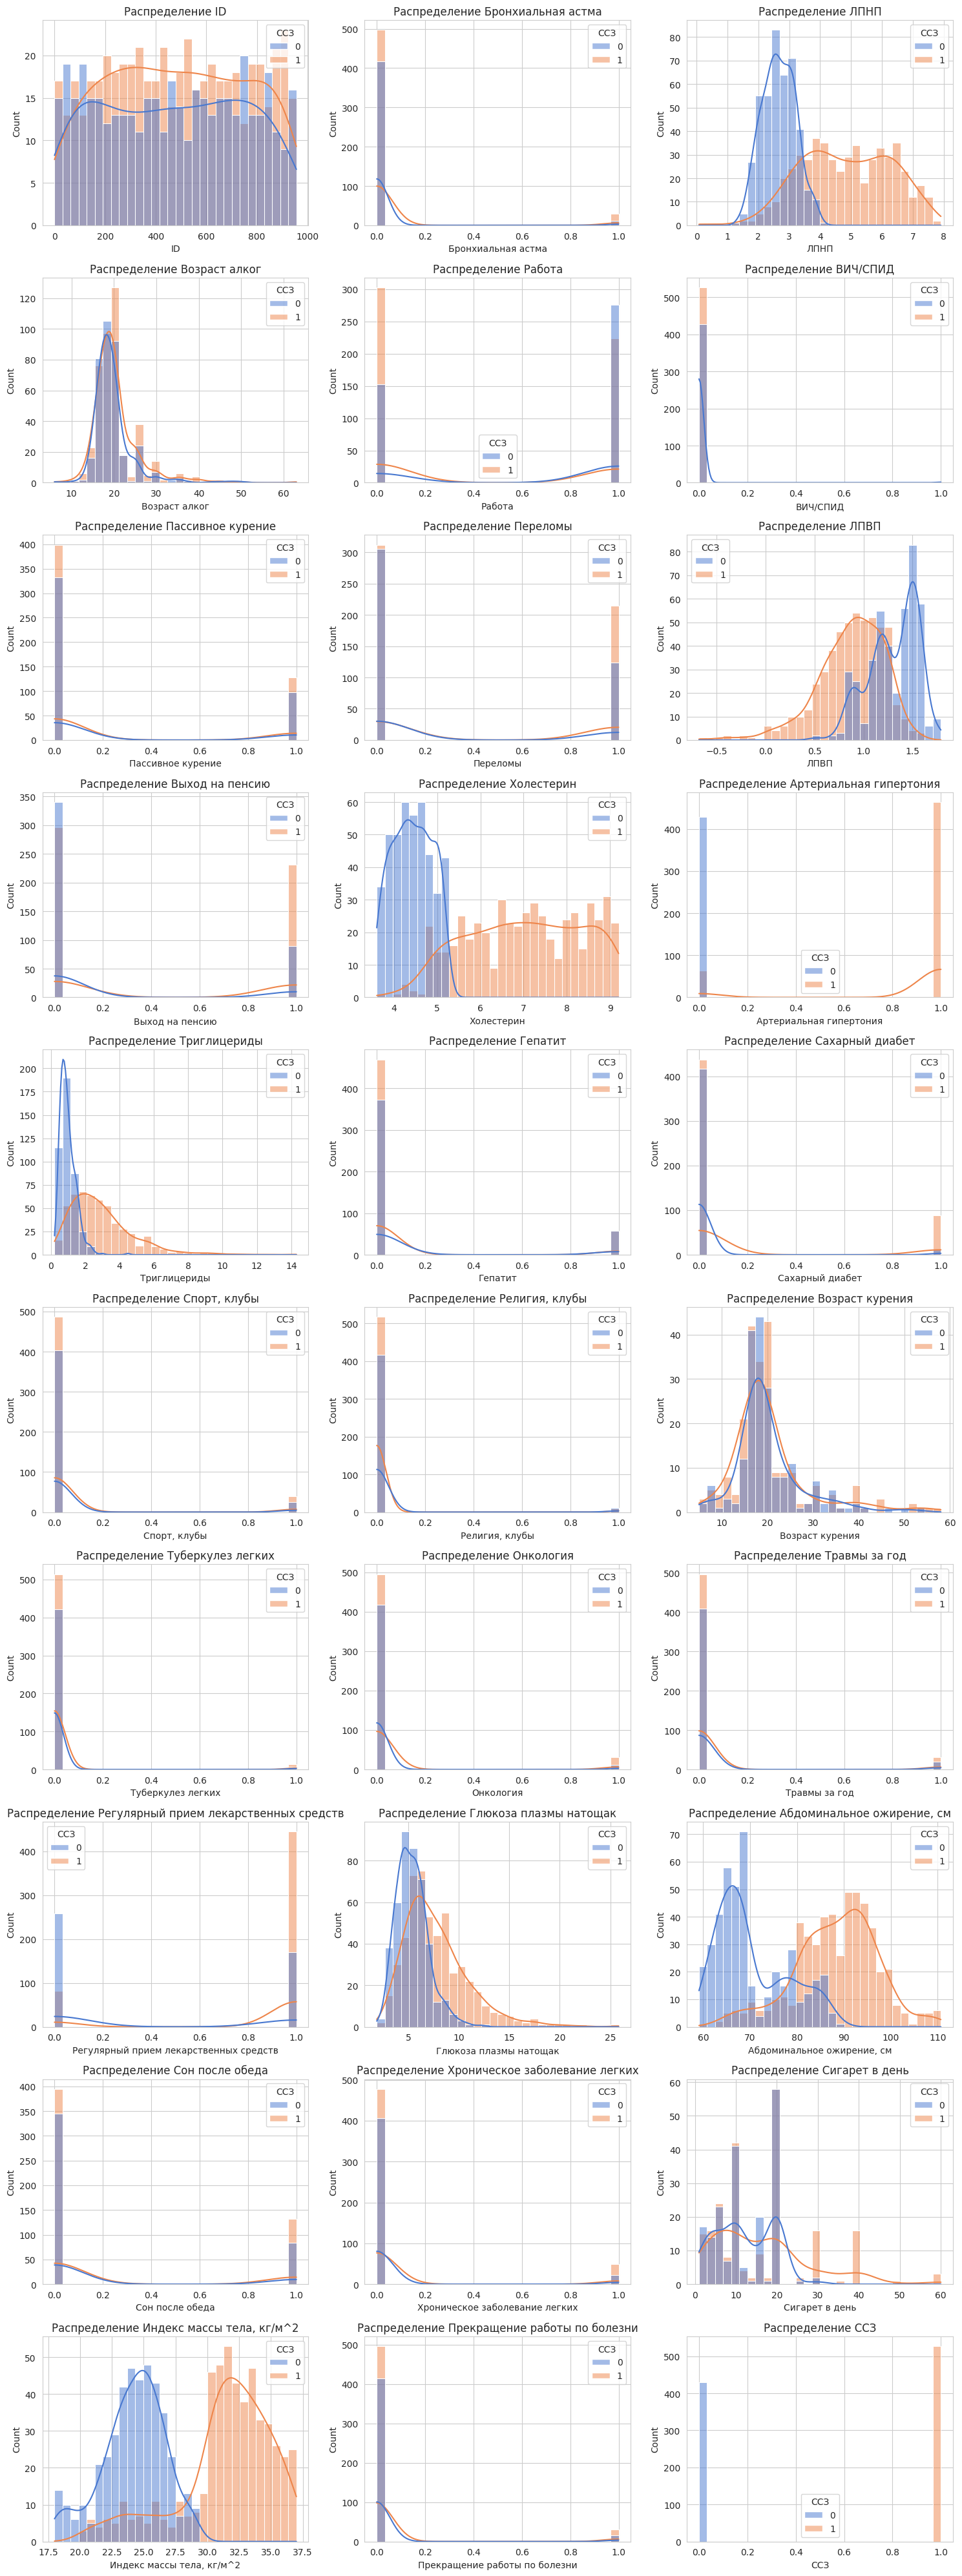

In [51]:
heart[numeric_columns] = heart[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 40))
for i, col in enumerate(numeric_columns):
    plt.subplot(10, 3, i+1)
    sns.histplot(data=heart, x=col, hue='ССЗ', kde=True, bins=30)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.savefig('Гистограммы.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Парные диаграмы рассеяния

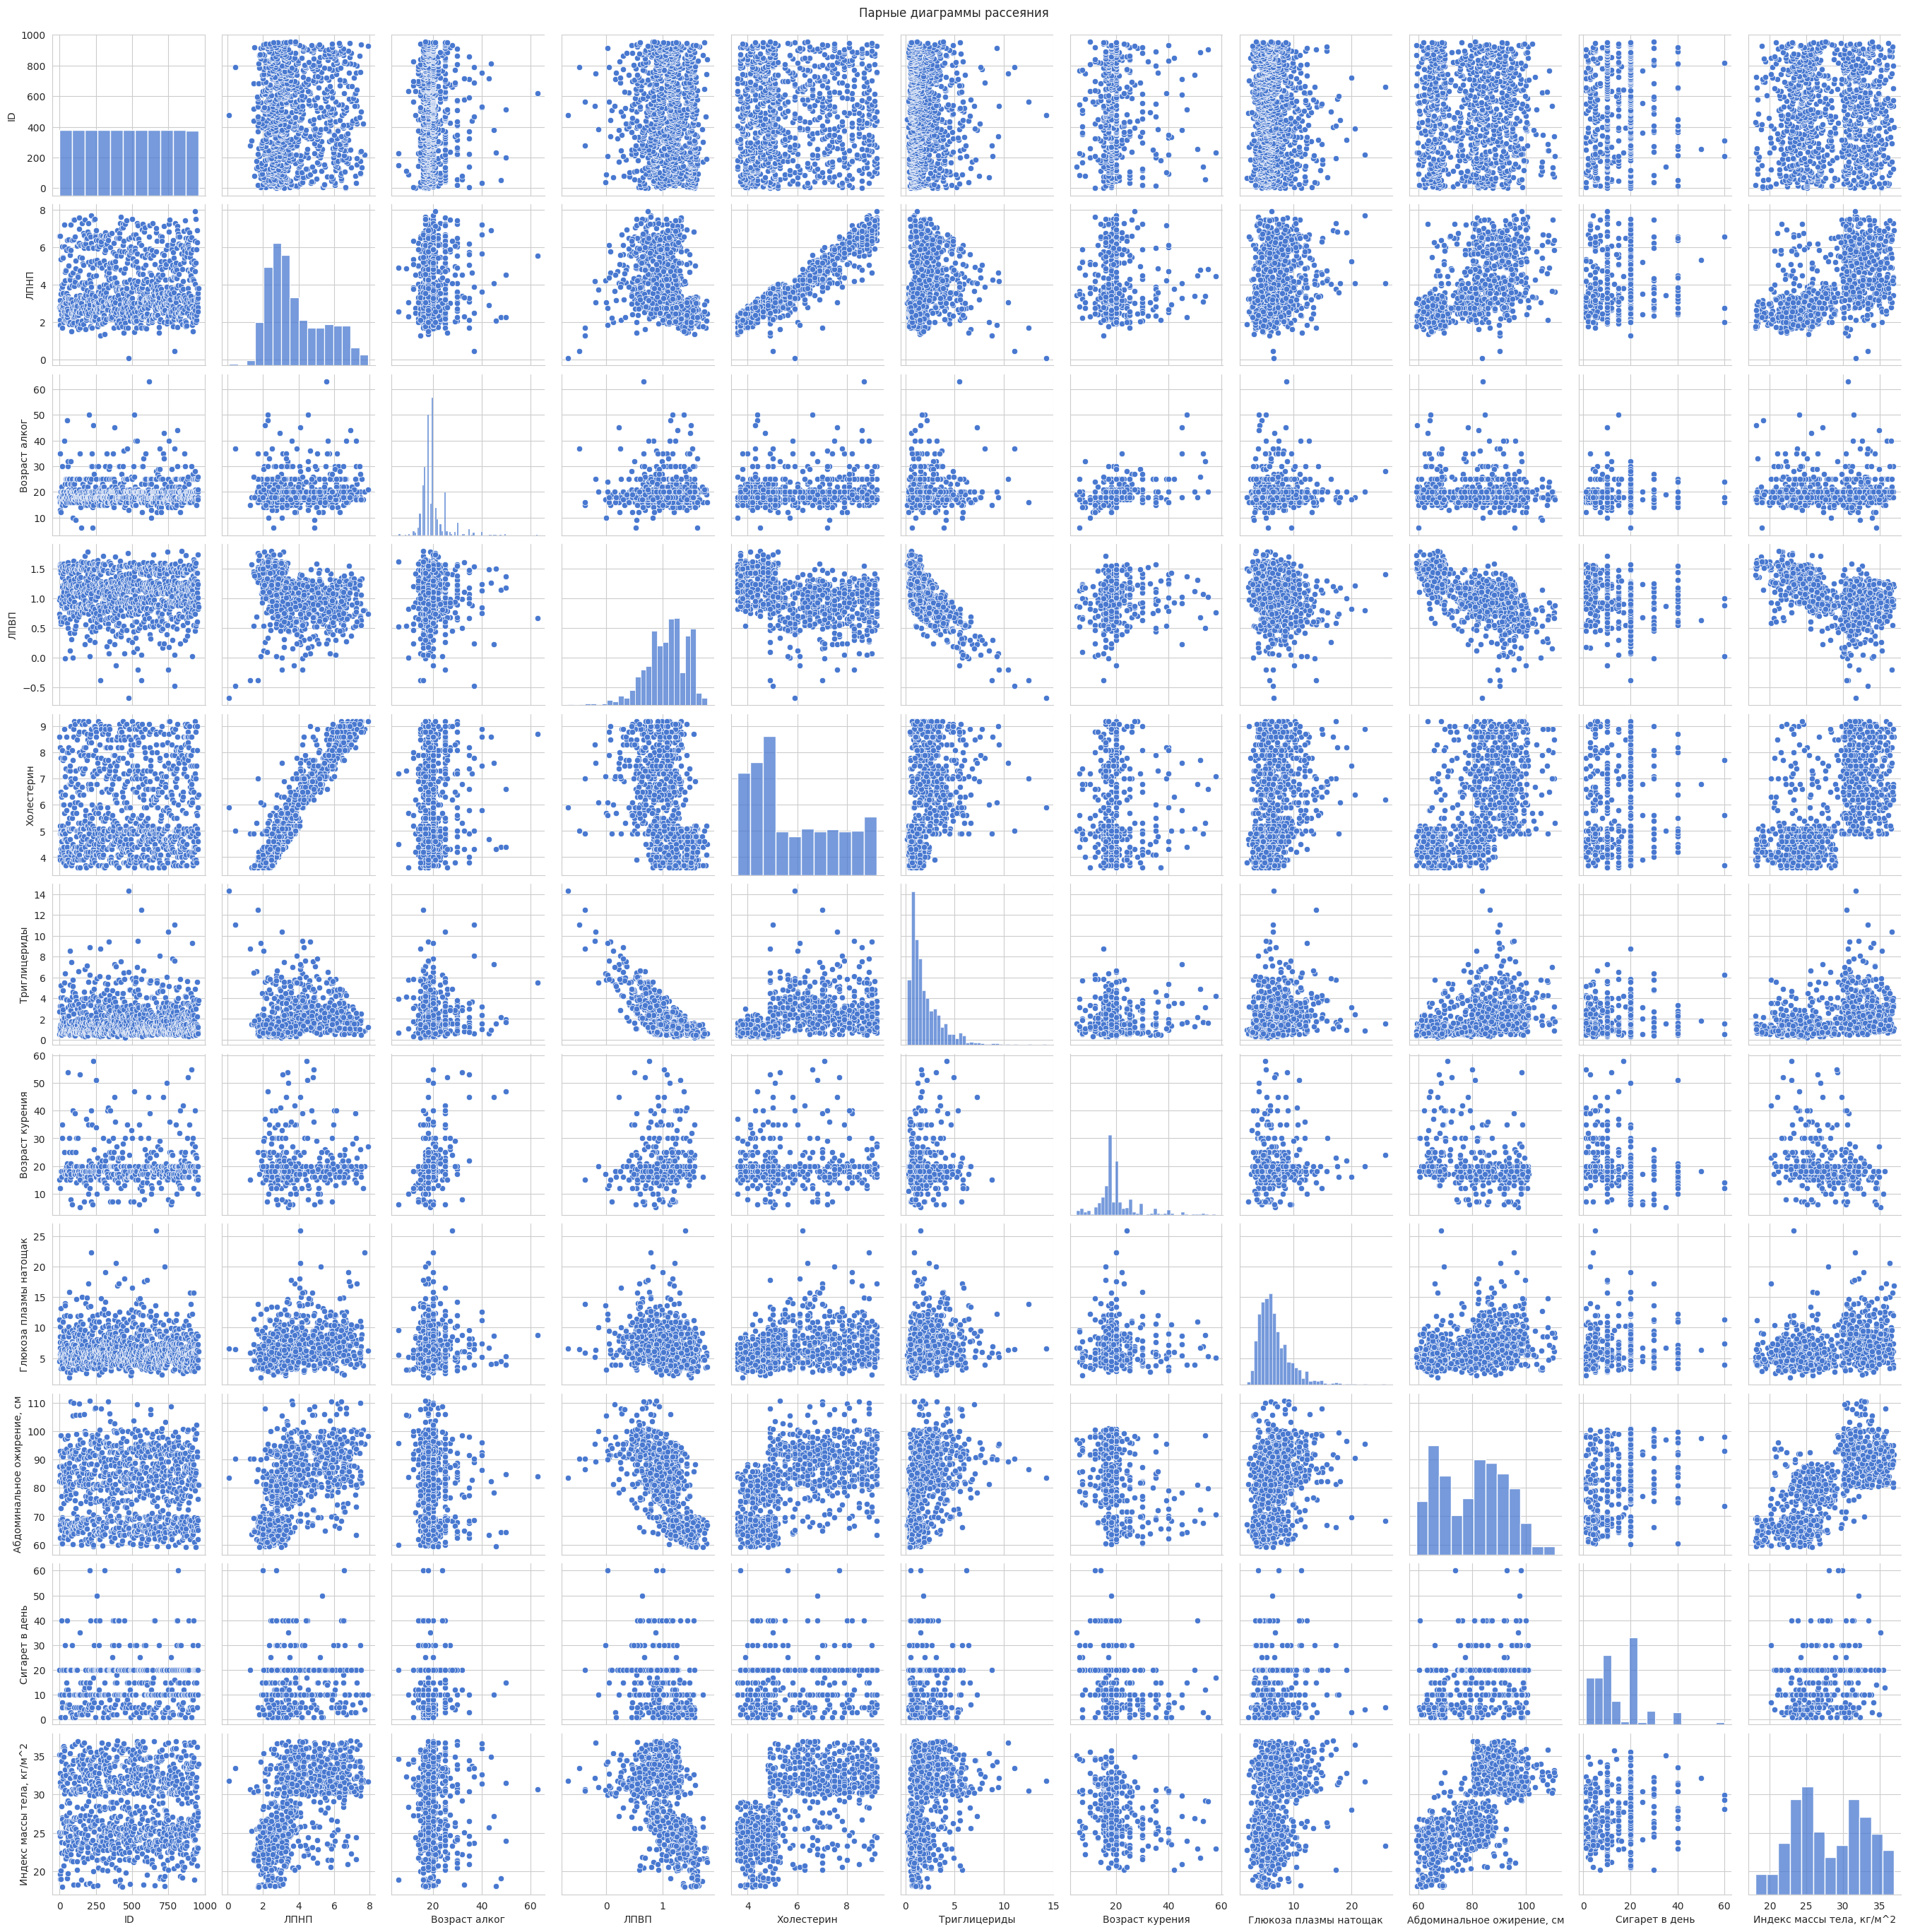

In [52]:
# Фильтруем переменные с количеством уникальных значений больше 2
filtered_columns = [col for col in numeric_columns if heart[col].nunique() > 2]

# Если есть подходящие столбцы, строим парные диаграммы
if filtered_columns:
    pairplot = sns.pairplot(heart[filtered_columns])
    plt.suptitle('Парные диаграммы рассеяния', y=1)  # Заголовок
    # Сохранение графика для использования в отчёте
    plt.savefig('Диаграммы рассеяния.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
else:
    print("Нет подходящих числовых переменных с уникальным количеством значений больше 2.")

## Анализ целевой переменной

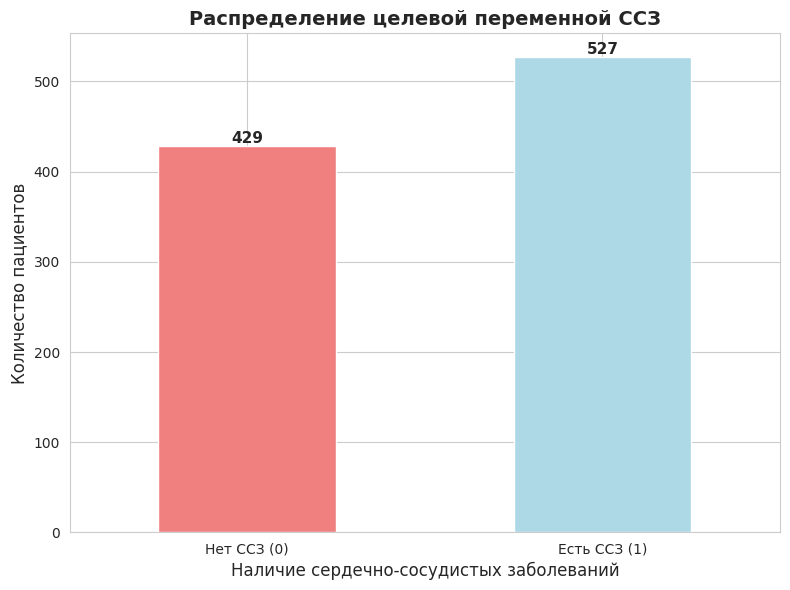

In [53]:
# Создание графика с добавлением метак данных
fig, ax = plt.subplots(figsize=(8, 6))
bars = heart['ССЗ'].value_counts().sort_index().plot(
    kind='bar',
    color=['lightcoral', 'lightblue'],
    ax=ax
)

# Добавление метак данных на столбцы
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Распределение целевой переменной ССЗ', fontsize=14, fontweight='bold')
plt.xlabel('Наличие сердечно-сосудистых заболеваний', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.xticks([0, 1], ['Нет ССЗ (0)', 'Есть ССЗ (1)'], rotation=0)
plt.tight_layout()

# Сохранение графика для использования в отчёте
plt.savefig('distribution_cardiovascular.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()


# ОЧИСТКА ДАННЫХ

## Неинформативные признаки

In [54]:
#список неинформативных признаков
low_information = []

#цикл по всем столбцам
for col in heart.columns:
    #наибольшая относительная частота в признаке
    top_freq = heart[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = heart[col].nunique() / heart[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

ID: 100.0% уникальных значений
Бронхиальная астма: 95.71% одинаковых значений
ВИЧ/СПИД: 99.79% одинаковых значений
Религия, клубы: 97.7% одинаковых значений
Туберкулез легких: 97.91% одинаковых значений
Онкология: 95.5% одинаковых значений
Этнос: 97.49% одинаковых значений
Прекращение работы по болезни: 95.19% одинаковых значений


In [55]:
# Удаление неинформотивных признаков
columns_to_remove = ["ID", 'Время пробуждения', "Время засыпания", "Этнос",
                     "Прекращение работы по болезни","Туберкулез легких",
                     "Бронхиальная астма", 'Онкология',
                     'Семья', 'Возраст алког','Частота пасс кур', 'ВИЧ/СПИД']
heart = heart.drop(columns=columns_to_remove)
heart.head()

,ЛПНП,Работа,Статус Курения,Пассивное курение,Переломы,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Глюкоза плазмы натощак,"Абдоминальное ожирение, см",Сон после обеда,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Религия,Профессия,ССЗ
0,2.79,1,Курит,0,0,0.97,0,4.0,0,0.52,...,4.44,82.3,0,0,20.0,3 - средняя школа / закон.среднее / выше среднего,25.1,Христианство,низкоквалифицированные работники,0
1,6.62,0,Никогда не курил(а),0,1,0.74,0,8.6,0,2.73,...,11.26,87.6,1,0,NaN,5 - ВУЗ,35.2,Христианство,дипломированные специалисты,1
2,3.17,0,Никогда не курил(а),1,0,1.57,0,5.2,0,1.02,...,7.65,67.5,0,0,NaN,5 - ВУЗ,19.0,Христианство,дипломированные специалисты,0
3,2.74,1,Бросил(а),1,0,0.68,0,4.9,1,3.25,...,8.48,93.1,0,0,10.0,3 - средняя школа / закон.среднее / выше среднего,31.6,Атеист / агностик,низкоквалифицированные работники,1
4,6.62,0,Никогда не курил(а),1,1,1.01,0,8.2,1,1.25,...,10.10,84.6,0,0,NaN,3 - средняя школа / закон.среднее / выше среднего,32.8,Христианство,операторы и монтажники установок и машинного о...,1


## Список столбцов с пропусками

In [56]:
cols_null_percent = heart.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

,0
Сигарет в день,57.217573
Возраст курения,56.903766
Пол,0.209205


## Столбчатая диаграмма пропусков

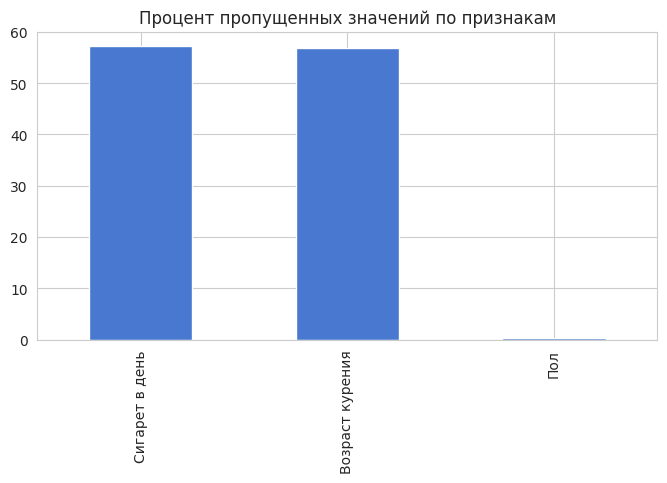

In [57]:
cols_with_null.plot(
    kind='bar',
    figsize=(8, 4),
    title='Процент пропущенных значений по признакам'
);
plt.savefig('Процент пропущеных.png', dpi=300, bbox_inches='tight', facecolor='white')

### Отбрасывание записей и признаков

In [58]:
#создаем копию исходной таблицы
drop_heart = heart.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_heart.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_heart = drop_heart.dropna(thresh=thresh, axis=1)#удаляем записи, в которых есть хотя бы 1 пропуск
drop_heart = drop_heart.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_heart.isnull().mean()

,0
ЛПНП,0.0
Работа,0.0
Статус Курения,0.0
Пассивное курение,0.0
Переломы,0.0
ЛПВП,0.0
Выход на пенсию,0.0
Холестерин,0.0
Артериальная гипертония,0.0
Триглицериды,0.0


### ВЫБРОСЫ

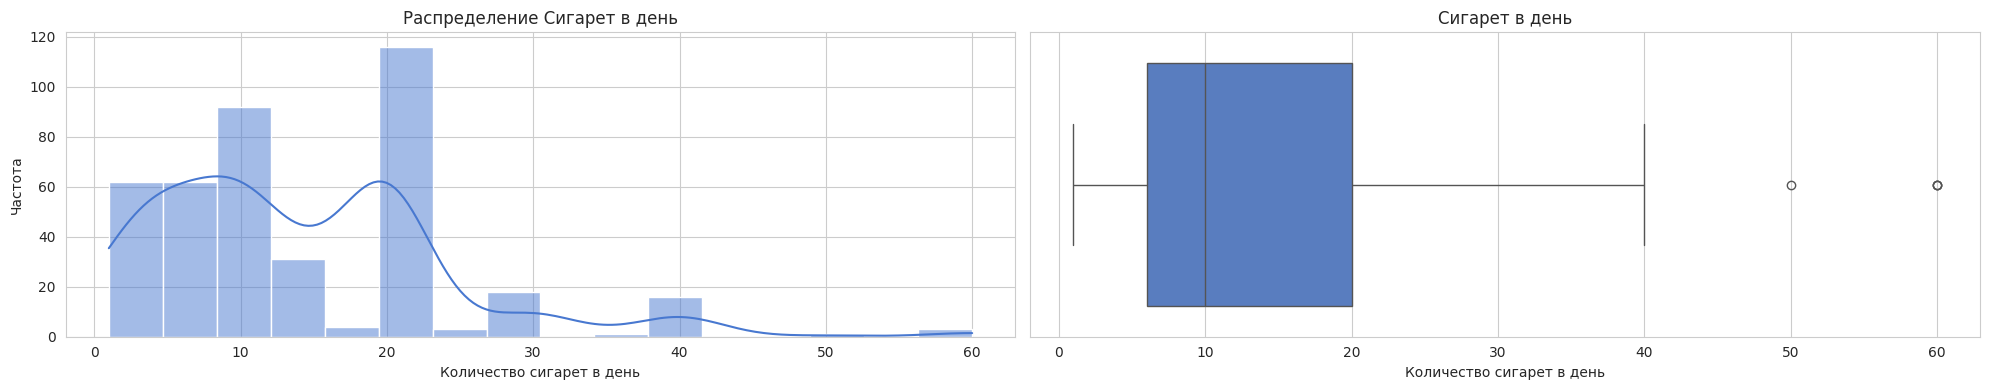

In [59]:
# Устанавливаем стиль seaborn
sns.set_style('whitegrid')

# Задаем палитру/цвет по умолчанию
sns.set_palette('muted')

# Создаем объект фигуры и массив осей
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

# Гистограмма распределения переменной 'Сигарет в день'
sns.histplot(data=heart, x='Сигарет в день', ax=axes[0], kde=True)
axes[0].set_title('Распределение Сигарет в день')
axes[0].set_xlabel('Количество сигарет в день')
axes[0].set_ylabel('Частота')

# Boxplot для переменной 'Сигарет в день'
sns.boxplot(data=heart, x='Сигарет в день', ax=axes[1])
axes[1].set_title('Сигарет в день')
axes[1].set_xlabel('Количество сигарет в день')

# Регулируем ориентацию и подписи осей
plt.tight_layout()
plt.savefig('Выбросы_Сигареты в день.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

* Ручной поиск

In [60]:
heart['Сигарет в день'].describe()

,Сигарет в день
count,409.000000
mean,14.220049
std,10.154710
min,1.000000
25%,6.000000
50%,10.000000
75%,20.000000
max,60.000000


In [61]:
# Подсчет количества строк, где "Сигарет в день" больше 40
count = heart[heart['Сигарет в день'] > 40].shape[0]

# Вывод результата
print(f'Количество строк с "Сигарет в день" больше 40: {count}')

Количество строк с "Сигарет в день" больше 40: 4


In [62]:
# Фильтрация значений, где "Сигарет в день" больше 40
filtered_values = heart.loc[heart['Сигарет в день'] > 40, 'Сигарет в день']

# Вывод значений на экран
print(filtered_values)

208    60.0
256    50.0
309    60.0
818    60.0
Name: Сигарет в день, dtype: float64


In [63]:
# Удаление строк, где "Сигарет в день" больше 40
heart = heart[heart['Сигарет в день'] <= 40]

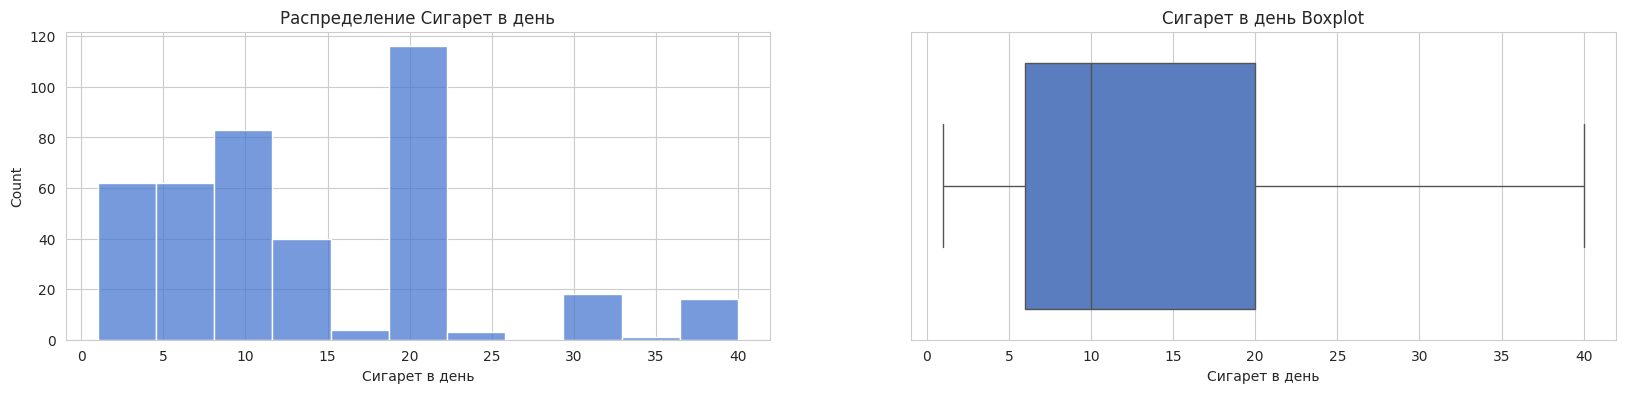

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
histplot = sns.histplot(data=heart, x='Сигарет в день', ax=axes[0]);
histplot.set_title('Распределение Сигарет в день');
boxplot = sns.boxplot(data=heart, x='Сигарет в день', ax=axes[1]);
boxplot.set_title('Сигарет в день Boxplot');

In [65]:
heart.to_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart1.csv', index=False)

# ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

* Например, Закодируем признак **Пол**

In [66]:
heart['Пол'] = heart['Пол'].map({'М': 0, 'Ж': 1})

* Закодируем признак **Образование**

In [67]:
heart['Образование'] = heart['Образование'].str[:1].astype(int)

In [68]:
columns_to_change = ['Национальность','Религия', 'Профессия', 'Статус Курения', 'Алкоголь']
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), heart[column].nunique())

Число уникальных значений признака Национальность:  13
Число уникальных значений признака Религия:  4
Число уникальных значений признака Профессия:  11
Число уникальных значений признака Статус Курения:  2
Число уникальных значений признака Алкоголь:  3


* Проведём кодирование категориальных переменных **OneHot-методом**




In [70]:
# 1. Определение категориальных столбцов для кодирования
columns_to_change = ['Национальность', 'Религия',
                    'Профессия', 'Статус Курения', 'Алкоголь']

print('Количество уникальных значений по категориям:')
for column in columns_to_change:
    print(f'{column}: {heart[column].nunique()}')

# 2. OneHot Encoding для признаков с малым числом категорий (до 5)
low_cardinality_cols = [col for col in columns_to_change if heart[col].nunique() <= 5]
print(f'\nOneHot для {low_cardinality_cols}:')

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' убирает мультиколлинеарность

heart_onehot = one_hot_encoder.fit_transform(heart[low_cardinality_cols])
columns_encoded = one_hot_encoder.get_feature_names_out(low_cardinality_cols)
heart_onehot_df = pd.DataFrame(heart_onehot, columns=columns_encoded, index=heart.index)

heart = pd.concat([heart.reset_index(drop=True), heart_onehot_df.reset_index(drop=True)], axis=1)
heart = heart.drop(columns=low_cardinality_cols)
print(f'Добавлено {len(columns_encoded)} новых столбцов [web:2]')

# 3. Binary Encoding для признаков с большим числом категорий
!pip install category_encoders -q
from category_encoders import BinaryEncoder

high_cardinality_cols = ['Национальность', 'Профессия']  # если остались
for col in high_cardinality_cols:
    if col in heart.columns:
        encoder = BinaryEncoder(cols=[col])
        newdata = encoder.fit_transform(heart[[col]])
        heart = pd.concat([heart, newdata], axis=1)
        heart = heart.drop(columns=[col])
        print(f'Binary кодирование {col} завершено')

# 4. Удаление избыточных столбцов (referent категории)
cols_to_drop = [col for col in heart.columns if 'Никогда не курил' in col or 'никогда не употреблял' in col]
heart.drop(columns=cols_to_drop, axis=1, inplace=True, errors='ignore')

print(f'\nИтоговая форма: {heart.shape}')
heart.info()

Количество уникальных значений по категориям:
Национальность: 13
Религия: 4
Профессия: 11
Статус Курения: 2
Алкоголь: 3

OneHot для ['Религия', 'Статус Курения', 'Алкоголь']:
Добавлено 6 новых столбцов [web:2]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.2 MB/s eta 0:00:00
Binary кодирование Национальность завершено
Binary кодирование Профессия завершено

Итоговая форма: (405, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ЛПНП                                    405 non-null    float64
 1   Работа                                  405 non-null    int64  
 2   Пассивное курение                       405 non-null    int64  
 3   Переломы                                405 non-null    int64  
 4   ЛПВП                                    405 non-null    float64
 5   Выход на 

In [71]:
# Визуализация результата
print("Категориальные столбцы после кодирования:")
cat_cols_after = [col for col in heart.columns if any(prefix in col for prefix in
           ['Религия', 'Национальность', 'Профессия'])]
print(heart[cat_cols_after].head())
print(f"\nВсего категориальных столбцов: {len(cat_cols_after)}")


Категориальные столбцы после кодирования:
   Религия, клубы  Религия_Ислам  Религия_Нет  Религия_Христианство  \
0               0            0.0          0.0                   1.0   
1               0            0.0          0.0                   0.0   
2               0            1.0          0.0                   0.0   
3               0            0.0          0.0                   1.0   
4               0            0.0          0.0                   1.0   

   Национальность_0  Национальность_1  Национальность_2  Национальность_3  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 1                 0   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   Профессия_0  Профессия_1  Профессия_2  Профессия_3  
0           

Удалено строковых столбцов: 0
Осталось числовых: 39


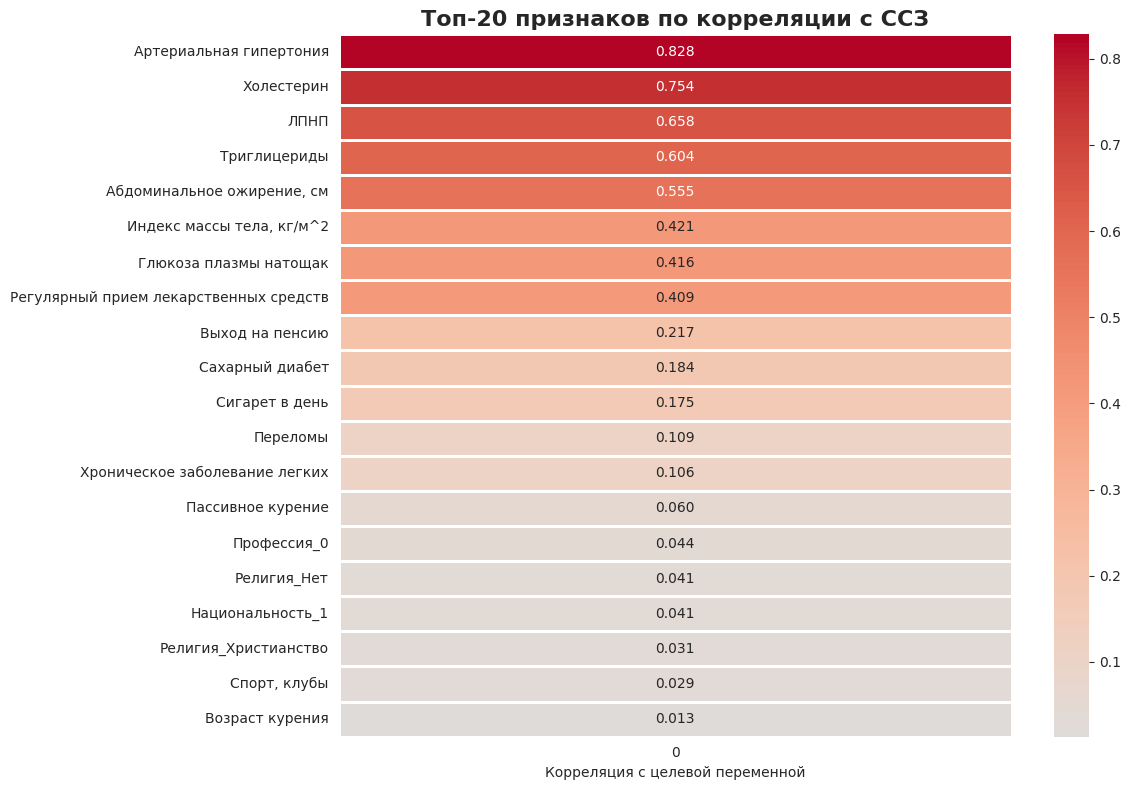


Топ-10 признаков:
ССЗ                                       1.000000
Артериальная гипертония                   0.828279
Холестерин                                0.754111
ЛПНП                                      0.657575
Триглицериды                              0.603684
Абдоминальное ожирение, см                0.555004
Индекс массы тела, кг/м^2                 0.420693
Глюкоза плазмы натощак                    0.416480
Регулярный прием лекарственных средств    0.408519
Выход на пенсию                           0.217442
dtype: float64


In [72]:
# Сохранение промежуточных результатов
heart.to_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_encoded.csv', index=False)

# УДАЛЯЕМ ВСЕ строковые столбцы для корреляции
numeric_heart = heart.select_dtypes(include=['number']).copy()
print(f"Удалено строковых столбцов: {heart.shape[1] - numeric_heart.shape[1]}")
print(f"Осталось числовых: {numeric_heart.shape[1]}")

# Теперь корреляция работает без ошибок
correlations = numeric_heart.corrwith(numeric_heart['ССЗ']).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlations.iloc[1:21].to_frame(),
    annot=True, cmap='coolwarm', center=0, fmt='.3f',
    linewidths=1, linecolor='white'
)
plt.title('Топ-20 признаков по корреляции с ССЗ', fontsize=16, fontweight='bold')
plt.xlabel('Корреляция с целевой переменной')
plt.tight_layout()
plt.savefig('correlation_heatmap.png.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nТоп-10 признаков:")
print(correlations.head(10))


# Сохранение очищенного датасета

In [73]:
heart.to_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart_clean.csv', index=False)